# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel K.\
_Student No._: 2021-07451\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/03/2024 12:59pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JED JERREL ESCARAN**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
#!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [4]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [5]:
data.files

['spec_recons', 'wavelength']

In [6]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

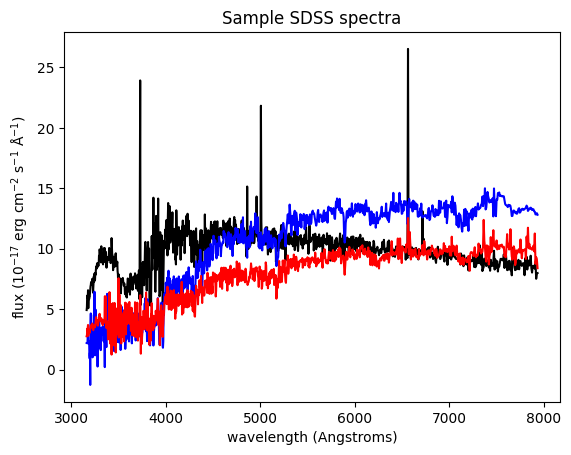

In [8]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


Text(0.5, 1.0, 'Mean Spectrum')

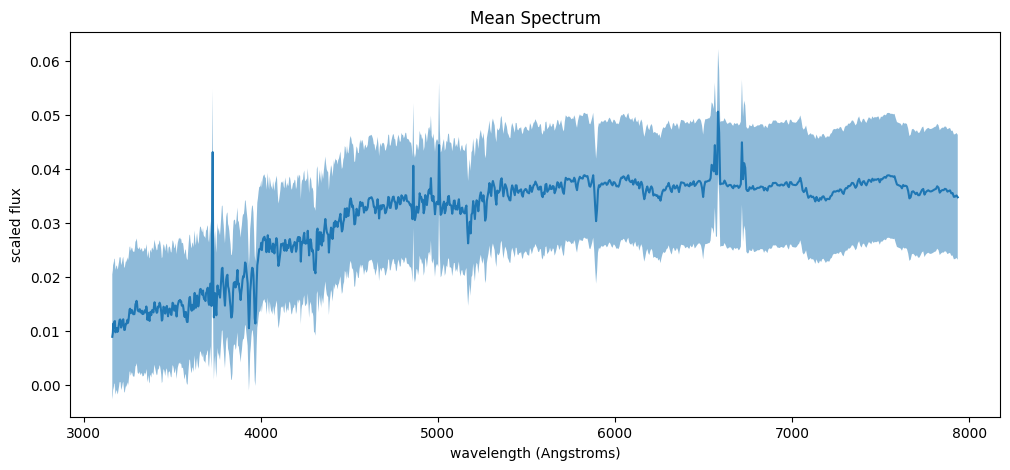

In [9]:
from sklearn.preprocessing import normalize
normalized_spec = normalize(data['spec_recons'])            # normalizing data
plt.figure(figsize=(12,5))

mean_row = np.mean(normalized_spec, axis=0)                 # taking mean
plt.plot(wavelength, mean_row)

std_row = np.std(normalized_spec)                           # taking std
plt.fill_between(wavelength, std_row+mean_row, mean_row-std_row, alpha=0.5)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux')
plt.title('Mean Spectrum')

The plot above shows the mean of the normalized spectra as the thick blue line and the standard deviation as the fill-betweens.

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # first 4 principal components
normalized_spec_proj = pca.fit_transform(normalized_spec) # fit the model and apply the dimensionality reduction
print(normalized_spec_proj.shape)  #checking shape

(4000, 4)



Similar to fourier transform wherein we can choose to "ignore" the 80% or so of the "noise" or "lesser relevant" information, choosing n-components to be 4 is of the same purpose. However instead of noise reduction (for fourier transform), in PCA we are reducing its dimensionality.




2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

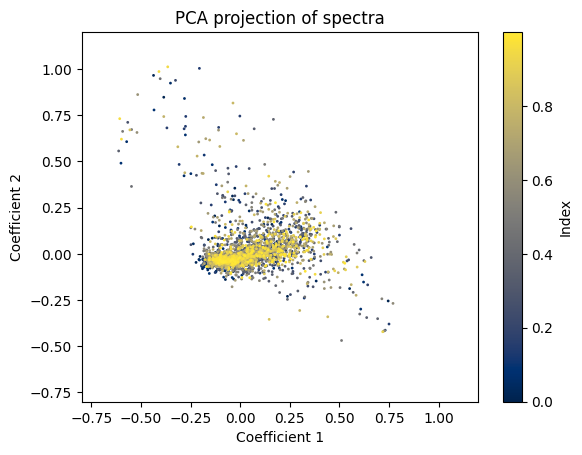

In [17]:
# plotting
indices = np.arange(normalized_spec_proj.shape[0]) / 4000                       # for color

plt.scatter(normalized_spec_proj[:, 0], normalized_spec_proj[:, 1], c=indices, cmap='cividis', s=4, lw=0)
plt.colorbar(label='Index')
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.title('PCA projection of spectra')
plt.xlim([-0.8,1.2])
plt.ylim(-0.8,1.2)
plt.show()

The scatter plot above shows the distribution of galaxies in a two-dimensional space defined by the first two principal components. Clusters and patterns evident in the plot signify groups of galaxies with similar spectral characteristics.




3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

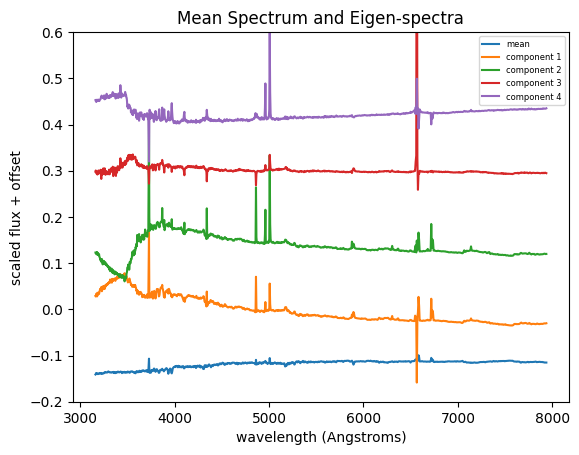

In [21]:
# plotting
plt.plot(wavelength, pca.mean_ - 0.15, label="mean")  # 0.15 as arbitrary y-offset
for i in range(4):
  plt.plot(wavelength, pca.components_[i] + 0.15 * i, label="component {}".format(i+1))
plt.ylim(-0.2, 0.6)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean Spectrum and Eigen-spectra')
plt.legend(fontsize=6, loc='upper right')

The plot shows the mean spectrum of the galaxy dataset after normalization and PCA transformation and the first 4 eigenvectors with arbitrary y-offset for clarity purposes. Each principal component contains the main patterns of spectral variation present in the given dataset, with the first component having greatest variation.




In [30]:
variance_explained = pca.explained_variance_ratio_                              # to see "contributions" of each component
total = 0
for i in range(len(variance_explained)):
    print(f"Variance explained by Component {i+1}: {variance_explained[i]}")
    total += variance_explained[i]
print(f"Variance explained by the first 4 components : {round(total*100, 2)}%")

Variance explained by Component 1: 0.44152915477752686
Variance explained by Component 2: 0.24275074899196625
Variance explained by Component 3: 0.10236335545778275
Variance explained by Component 4: 0.06901459395885468
Variance explained by the first 4 components : 85.57%


explained_variance_ratio_ is an attribute of the PCA object which provides the proportion of variance explained by each principal component. For component 1, its variance explained is the highest, at 44.15%. The variance explained by the first 4 principal components contributes to around 85%, relative to the total variance in the data. Note that if you choose enough components to explain most of the variance in the data, the cumulative explained variance will approach 100%.